In [1]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

/Users/ericpei/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [42]:
import seaborn as sns

In [4]:
%matplotlib inline

In [16]:
df = pd.read_csv('data.csv', delimiter='\t')

In [18]:
df = df.drop('Unnamed: 0', axis=1)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 0 to 239
Data columns (total 7 columns):
Year                 240 non-null int64
Team and Location    240 non-null object
FT/Game              240 non-null float64
Wins                 240 non-null int64
Loss                 240 non-null int64
Win%                 240 non-null float64
Attendance           240 non-null int64
dtypes: float64(2), int64(4), object(1)
memory usage: 15.0+ KB


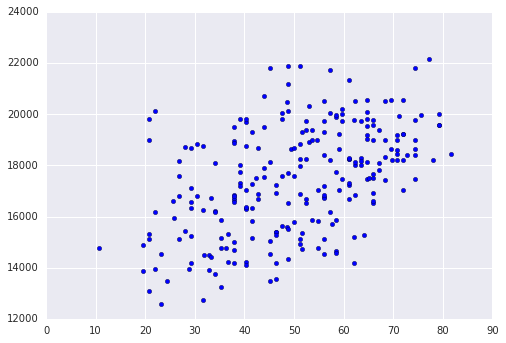

In [46]:
plt.scatter(df['Win%'], df['Attendance'])

In [34]:
from scipy import stats
import numpy as np

In [35]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df['Win%'],df['Attendance'])

In [92]:
print 'P Value: ', p_value
print 'Slope: ', slope
print 'Intercept', intercept
print 'R Squared', r_value**2

P Value:  1.77540383543e-15
Slope:  66.5636215161
Intercept 14123.6574837
R Squared 0.233952872474


## On average, an increase of 1% in Total Win Percentage, increases average attendance by 66-67 people.

In [23]:
df.corr(method='pearson')

,Year,FT/Game,Wins,Loss,Win%,Attendance
Year,1.000000,-0.229716,0.011473,0.023204,-0.005954,0.084405
FT/Game,-0.229716,1.000000,0.196954,-0.128318,0.164935,-0.005891
Wins,0.011473,0.196954,1.000000,-0.910917,0.975069,0.477499
Loss,0.023204,-0.128318,-0.910917,1.000000,-0.975550,-0.461705
Win%,-0.005954,0.164935,0.975069,-0.975550,1.000000,0.483687
Attendance,0.084405,-0.005891,0.477499,-0.461705,0.483687,1.000000


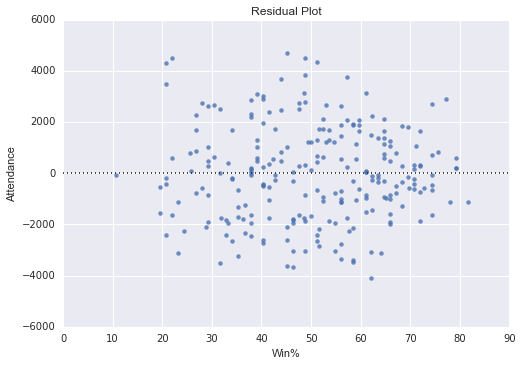

In [224]:
sns.residplot(df['Win%'],df['Attendance'])
plt.title('Residual Plot')
plt.show()

## Average NBA Ticket Price According to www.Statista.com 55.88 Dollars

In [52]:
Value_Per_game = round(55.88 * slope, 2)
print "Additional Revenue per game per 1% increase in total win percentage: $", Value_Per_game

Additional Revenue per game per 1% increase in total win percentage: $ 3719.58


In [53]:
home_games = 82/2

In [54]:
Value_year = Value_Per_game * home_games
print "Additional Revenue in ticket sales per year per 1% increase in total win percentage: $", Value_year

Additional Revenue in ticket sales per year per 1% increase in total win percentage: $ 152502.78


In [55]:
from sklearn.linear_model import LinearRegression

In [208]:
model = LinearRegression(fit_intercept=True)

In [209]:
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [210]:
X = df.iloc[:,3:4]

In [211]:
model.fit(X, df['Attendance'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [212]:
print 'Coefficient: ', model.coef_[0]

Coefficient:  80.2085009161


In [192]:
model.intercept_

14244.365159118963

In [114]:
print'Variance score: %.5f' % model.score(X, df['Attendance'])

Variance score: 0.22801


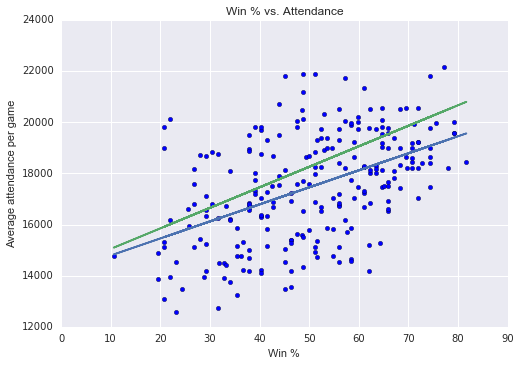

In [231]:
plt.scatter(df['Win%'], df['Attendance'])
plt.title('Win % vs. Attendance')
plt.xlabel('Win %')
plt.ylabel('Average attendance per game')
plt.plot(df['Win%'], df['Win%']*slope + intercept)
plt.plot(df['Win%'], df['Win%']*model.coef_[0] + model.intercept_)
plt.show()

In [217]:
from sklearn.metrics import mean_squared_error

In [218]:
mean_squared_error(model.predict(X), df['Attendance'])

3415398.3433018033

In [220]:
print("Residual sum of squares sklearn: %.2f"
      % np.sum((model.predict(X) - df['Attendance']) ** 2))

Residual sum of squares sklearn: 819695602.39


In [219]:
mean_squared_error(df['Win%']*float(slope)+intercept, df['Attendance'])

3389084.2974850913

In [221]:
print("Residual sum of squares scipy: %.2f"
      % np.sum((df['Win%']*float(slope)+intercept - df['Attendance'].astype(float))**2))

Residual sum of squares scipy: 813380231.40


In [242]:
df_statsmodel = df.rename(columns = {'Win%': 'WinP'})

In [266]:
import statsmodels.api as sm

In [267]:
add_cons = sm.add_constant(df['Win%'])

In [268]:
import statsmodels.formula.api as smf

lm = smf.ols(formula= 'Attendance~add_cons', data=df_statsmodel).fit()

lm.params

Intercept      7061.828742
add_cons[0]    7061.828742
add_cons[1]      66.563622
dtype: float64

In [233]:
df.head()

,Year,Team and Location,FT/Game,Wins,Loss,Win%,Attendance
0,2009,Boston Celtics,25.304878,61,21,74.390244,18624
1,2009,Philadelphia 76ers,27.024390,41,41,50.000000,15802
2,2009,New Jersey Nets,24.146341,34,48,41.463415,15147
3,2009,Toronto Raptors,22.695122,33,49,40.243902,18773
4,2009,New York Knicks,23.170732,34,48,41.463415,19287


In [250]:
pd.DataFrame.cov(df)

,Year,FT/Game,Wins,Loss,Win%,Attendance
Year,5.271967,-1.301778,0.330544,0.669456,-0.209400,408.483264
FT/Game,-1.301778,6.091424,6.099521,-3.979500,6.234745,-30.644651
Wins,0.330544,6.099521,157.450418,-143.625523,187.393559,12628.862029
Loss,0.669456,-3.979500,-143.625523,157.892608,-187.749026,-12228.282775
Win%,-0.209400,6.234745,187.393559,-187.749026,234.582019,15614.628748
Attendance,408.483264,-30.644651,12628.862029,-12228.282775,15614.628748,4442630.804585


In [251]:
covar = 15614.628748

In [276]:
pd.DataFrame.std(df)

Year             2.296076
FT/Game          2.468081
Wins            12.547925
Loss            12.565533
Win%            15.316071
Attendance    2107.754920
dtype: float64

In [253]:
win_sd = 15.316071

In [255]:
covar/(win_sd)**2

66.56361823461488

In [272]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Attendance   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.231
Method:                 Least Squares   F-statistic:                     72.69
Date:                Fri, 17 Jun 2016   Prob (F-statistic):           1.78e-15
Time:                        11:48:44   Log-Likelihood:                -2144.9
No. Observations:                 240   AIC:                             4294.
Df Residuals:                     238   BIC:                             4301.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    7061.8287    204.489     34.534      0.000    6658.989    7464.669
add_cons[0]  7061.8287    204.489     34.534      0.000    6658.989    7464.669
add_cons[1]    66.5636      7.808      8.526      0.000      51.183      81.944
==============================================================================
Omnibus:                        3.883   Durbin-Watson:                   2.224
Prob(Omnibus):                  0.143   Jarque-Bera (JB):                3.344
Skew:                           0.199   Prob(JB):                        0.188
Kurtosis:                       2.581   Cond. No.                     7.47e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.18e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## 95% confidence WinP coefficient is between 51.183 and 81.944

In [292]:
per_game = 100*(1/82.0)

In [293]:
ticket_price = 55.88

In [300]:
increase_in_wins = .99

In [301]:
home_games

41

In [302]:
per_game*increase_in_wins*slope*ticket_price*home_games

184118.97093068881